Name: Kashish Sansanwal<br>
Student ID: 1529527<br>
CCID: ksansanw<br>
Course: CMPUT 366 LEC A1 Fall 2021<br>
Instructor:  Levi Santana de Lelis<br>



#**Image Classification Project using Convolutional Neural Network on CIFAR-10 dataset**
---

![picture](https://drive.google.com/uc?export=view&id=13eVmkm_vdy-uq1z3Bp021rJNkuD2me2F)
---
#INTRODUCTION
---
#What is this project about?
This project is about correctly classifying images from **10 different classes** on a dataset of **50000 images**. This classification model will make use of **covolutional neural network**. This project will use **sparse categorical crossentropy** loss function which we studied in the class. We will compare two models, one without convolutional layers and one with convolutional layers and find out which performs better and why.

#Topics covered in this project


*   Multilayer Neural Network 
*   Convolution neural network
*   Sequentional model in Keras
*   ReLu activation function 
*   Sigmoid activation function
*   Adam optimizer
*   Epoch

#Why is it important?
This project is the basic stepping stone towards understanding computer vision and deep learning concepts. It is important to understand through this project the working of convolutional layers and convolutional neural network using cross entropy loss function to predict and classify the image between 10 different classes. 



---
#Evaluation
---
Import all the necessary libraries required for the project.


*   Tensorflow
*   Keras
*   Matplotlib
*   Numpy 



In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the CIFAR 10 dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print("Shape of training dataset ",x_train.shape)
print("Shape of testing dataset ",x_test.shape)
print("Shape of y_train ",y_train.shape)
print("Shape of y_test ",y_test.shape)

Shape of training dataset  (50000, 32, 32, 3)
Shape of testing dataset  (10000, 32, 32, 3)
Shape of y_train  (50000, 1)
Shape of y_test  (10000, 1)



*   x_train : It consists 50000 32x32 colour training images. <br>

*   x_test : It consists 50000 32x32 colour testing images. <br>
*   y_train : It consists the classes that each image is labelled in training  dataset. <br>
*   y_test : It consists the classes that each image is labelled in testing dataset. <br>




In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train and y_test is a 2D arrays <br>
In-order to use the y_train and y_test labels for each image we need to flatten y_train and y_test to 1D array


In [4]:
y_train = y_train.flatten()
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.flatten()
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

To better understand the labels we will define an array classes with each index as class name. 

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

A quick view at the images in the dataset with the class name.

In [7]:
def plot_images(x, y, index):
    plt.imshow(x[index])
    plt.title(classes[y[index]])

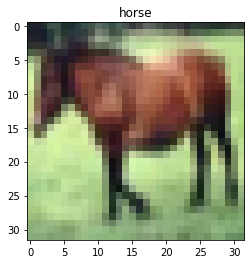

In [8]:
plot_images(x_train, y_train ,7)

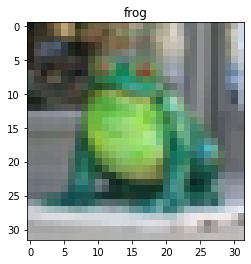

In [9]:
plot_images(x_train, y_train, 19)


Every image in the dataset have 3 color channels (Red, Green, Blue) and every colour channel can range from 0 to 255. Therefore in-order to normalize the data between 0 and 1, we will divide the dataset by 255. 

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Now, we will build a neural network using **Sequential model** in Keras library in Tensorflow. <br>

In this project we don't have multiple input layers and output layers so it is best to use Sequential model.<br>

*Sequential model is a linear stack of layers.*

It will help us to create multiple layers in our neural network.<br>

We also need to provide the activation function for each layer.

For the hidden layers, we will provide the activation function **ReLu**<br>
>![picture](https://drive.google.com/uc?export=view&id=1cpkjfral2lPBINa2-FPIgShpjMbdn5Em) <br>

For the output layer , we will provide the activation function **sigmoid**
>![picture](https://drive.google.com/uc?export=view&id=1mJeHlyCzz_LLF09LISmSIWovsuI3f_H0) <br>

where z and x are the input.





In [11]:
model_1 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(4000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

Now we will compile our model using the function compile in the Sequential model.<br>
In-order to use the compile function we need to provide which optimizer to use and which loss function to be used.

For this project we are using the optimizer **adam**<br>

*Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
This algorithm can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. [1]*<br> 

The loss function we are using is **sparse categorical crossentropy**<br>

\begin{equation*}
J(w_i) = - \bigg( \frac{1}{m} \sum_{x, y} y \ln(h_{w_i}(x)) + (1 - y) \ln(1 - h_{w_i}(x)) \bigg )
\end{equation*}


In [12]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Finally, we will train this dataset to 10 epochs. One Epoch is simply one full cycle of training the whole dataset. 

In [13]:
model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.8870 - accuracy: 0.3308
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6617 - accuracy: 0.4038
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5729 - accuracy: 0.4356
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5250 - accuracy: 0.4543
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4854 - accuracy: 0.4693
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4504 - accuracy: 0.4815
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4228 - accuracy: 0.4912
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3966 - accuracy: 0.4992
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3756 - accuracy: 0.5063
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [14]:
print("Loss and Accuracy on training dataset: ",model_1.evaluate(x_train,y_train))

1563/1563 [==============================] - 9s 5ms/step - loss: 1.3199 - accuracy: 0.5267
Loss and Accuracy on training dataset:  [1.319903016090393, 0.5266799926757812]


Even after using multiple layers with cross entropy function, the accuracy is still 51% with a high loss value.

Therefore to improve the accuracy of out model we need to use Convolutional layers and make a Convolutional neural network. 

Images with higher resolution for example Full HD image of size 1920x1080 will have 2073600 pixels. This is extremly large input dataset considered this is only one image. Training will require thousands of images. This requires a lot of computing power.

The advantage of Convolutional Neural Network (CNN) is that it reduces the dimensions of the image while keeping all the important features of the image required to train the model inorder to make good prediction. Therefore, CNN makes the model faster.

>![picture](https://drive.google.com/uc?export=view&id=1VKmXdUHdjv1IjTtlNTyo-HVk1QRY2De8)<br> [Reference: https://developers.google.com/machine-learning/practica/image-classification/images/cnn_architecture.svg]

#Elements of a Convolutional Neural Network
##Kernel
Kernal is a filter that extracts the features from the image. It is a matrix that moves over the input data and performs dot product with each sub-region it is superimposed upon and gets the final output inform of a matrix which known as a feature map. 
To find the size of feature map we can use the formula 

\begin{equation*}
O = \frac{I - K + 2P}{S} + 1 
\end{equation*}<br>



*   O : Feature map size
*   I : Size of the input
*   K : Size of the kernel
*   P : Size of padding 
*   S : Stride<br>



>![picture](https://drive.google.com/uc?export=view&id=168uwTgkTnZnsZ-EvDf1SF2HRNzsI65em)<br> [Reference: Going Deep in Medical Image Analysis: Concepts, Methods, Challenges and Future Directions - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Working-of-a-convolutional-layer-CNNs-force-kernel-weights-to-become-network-parameters_fig4_331165618 [accessed 13 Dec, 2021]]

##Stride
The amount of movement of kernel over the input image is known as stride. By default the stride is 1 in both horizontal and vertical movements.

##Padding
Padding adds a layer of zeros around the input matrix which helps to control the spatial size of the output. Pooling helps to preserve the spatial size from input matrix  till output matrix. 

##MaxPool
Maxpooling helps us to further scale down our feature map.
We will use max pooling of size 2x2.

##Flatten
In the end we flatten the image in order to perform classification.



In [15]:
model_2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [16]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model_2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5625 - accuracy: 0.4226
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1503 - accuracy: 0.5911
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9767 - accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8623 - accuracy: 0.6992
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7767 - accuracy: 0.7272
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7056 - accuracy: 0.7523
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6570 - accuracy: 0.7687
Epoch 8/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.6006 - accuracy: 0.7878
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5521 - accuracy: 0.8063
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [18]:
print("Loss and Accuracy on training dataset: ",model_2.evaluate(x_train,y_train))

1563/1563 [==============================] - 7s 5ms/step - loss: 0.4732 - accuracy: 0.8338
Loss and Accuracy on training dataset:  [0.47315651178359985, 0.8338199853897095]


---
#Evaluation
---
##Difference before and after using Convolutional Neural Network.
**Highest accuracy achieved using Cross Entropy without Convolutional layers is 51%<br>
Highest accuracy achieved using Cross Entropy with Convolutional layers is 84%<br>
This is a significant increase of 64.7%**

Thus, Convolutional Neural Network is the best approach for image classification because it is faster and very effective for larger datasets.

###How this model can be further improved?
This model can be further improved using more number of layers in the neural network and increasing the number of kernel filters will also imporve accuracy.

In [19]:
y_pred = model_2.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]

For a quick check if the model predicts the image correctly we can pass any index value to check the image and then pass the same index in the classes dataset to check if it is correctly predicted.

Enter an index between 0-9: 
8
Actual image and label: 


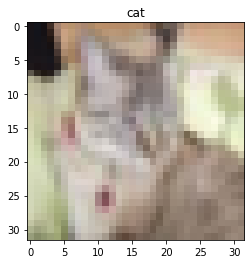

In [28]:
print("Enter an index between 0-9: ")
val = input()
print("Actual image and label: ")
plot_images(x_test, y_test,int(val))


In [29]:
print("Predicted label: ",classes[y_classes[int(val)]])

Predicted label:  cat


## A heatmap comparing the predictions for each of the 10 classes.

In [22]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_classes)

Text(87.0, 0.5, 'Truth')

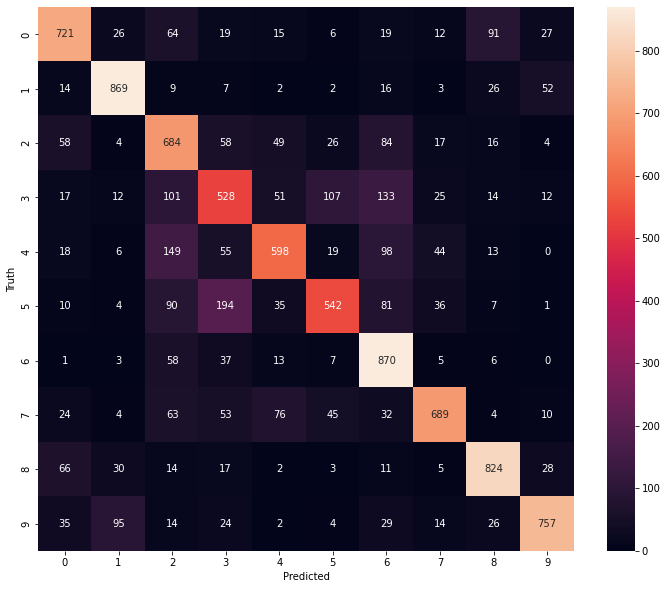

In [23]:
import seaborn as sn
plt.figure(figsize = (12,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

###References


*   https://cs231n.github.io/convolutional-networks/#layers
*   https://www.cs.toronto.edu/~kriz/cifar.html
*   https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

